In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 6.5MB 12.2MB/s 
     |████████████████████████████████| 14.8MB 228kB/s 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
data1 = pd.read_csv("gdrive/My Drive/air_quality_state.csv")

In [ ]:
data1

,Country,State,city,place,lastupdate,Avg,Max,Min
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,70.0,108.0,42.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,76.0,102.0,43.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,73.0,118.0,46.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,5.0,6.0,4.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,41.0,109.0,2.0
...,...,...,...,...,...,...,...,...
819,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00,49.0,83.0,14.0
820,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00,8.0,13.0,2.0
821,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00,5.0,8.0,2.0
822,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00,33.0,67.0,14.0


In [ ]:
fp = "gdrive/My Drive/india/india_administrative_state_boundary.shp"

In [ ]:
map_data = gpd.read_file(fp)

In [ ]:
map_data.head()

,gid,st_nm,tid,territory_,geometry
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [ ]:
data1.rename(columns = {'State' : 'st_nm'},inplace=True)

In [ ]:
data1.head()

,Country,st_nm,city,place,lastupdate,Avg,Max,Min
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,70.0,108.0,42.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,76.0,102.0,43.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,73.0,118.0,46.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,5.0,6.0,4.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00,41.0,109.0,2.0


In [ ]:
merged= map_data.merge(data1, on='st_nm', how='left')
merged.head()

,gid,st_nm,tid,territory_,geometry,Country,city,place,lastupdate,Avg,Max,Min
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",India,Gaya,"Collectorate, Gaya - BSPCB",21-12-2018 03:00,342.0,456.0,226.0
4,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",India,Gaya,"Collectorate, Gaya - BSPCB",21-12-2018 03:00,12.0,15.0,10.0


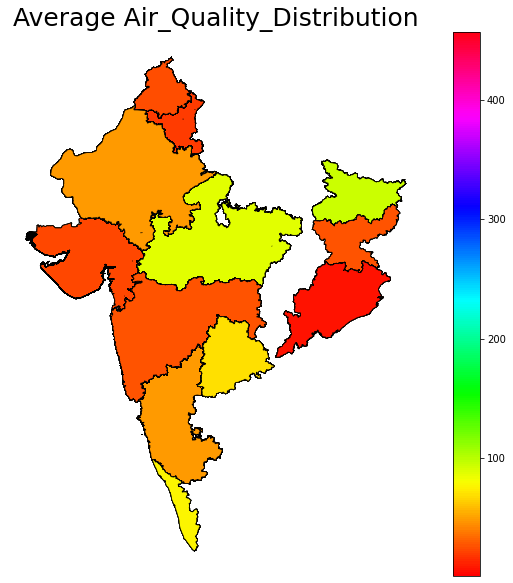

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Average Air_Quality_Distribution',fontdict={'fontsize':'25', 'fontweight':'10'})

merged.plot(column='Avg',cmap='hsv',linewidth=0.8,ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

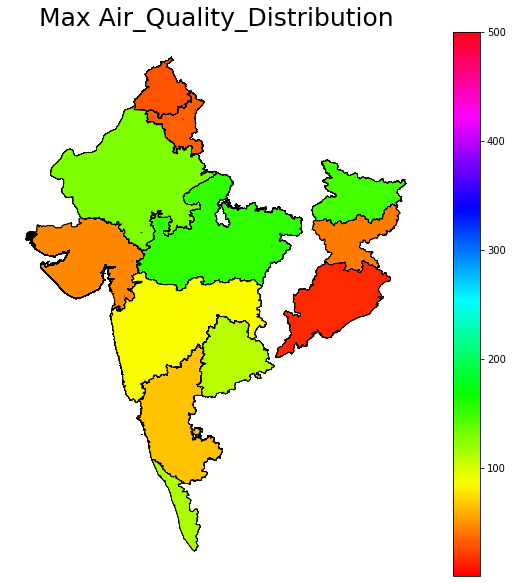

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Max Air_Quality_Distribution',fontdict={'fontsize':'25', 'fontweight':'10'})

merged.plot(column='Max',cmap='hsv',linewidth=0.8,ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

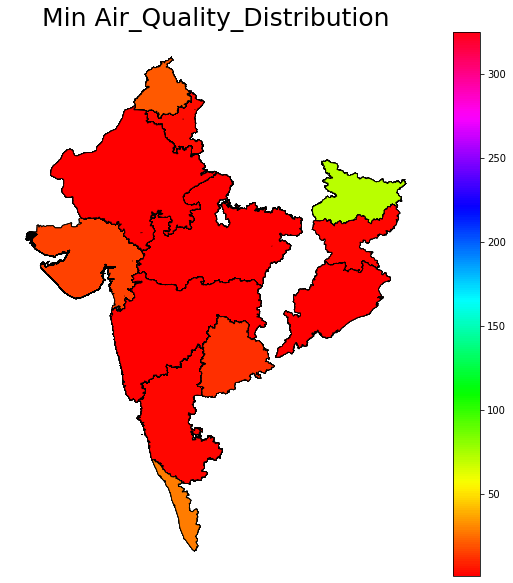

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Min Air_Quality_Distribution',fontdict={'fontsize':'25', 'fontweight':'10'})

merged.plot(column='Min',cmap='hsv',linewidth=0.8,ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])